<a href="https://colab.research.google.com/github/Musaddikul/Data-Analysis/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing  libraries & dependencies

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import Data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/creditcard.csv")

In [3]:
pd.options.display.max_columns = None

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit = df.drop('Time', axis = 1)     # axis = 1 means Column

In [6]:
credit.shape

(284807, 30)

In [7]:
credit.duplicated().any()

True

In [8]:
credit.drop_duplicates(inplace = True)
credit.shape

(275663, 30)

#### Checking the number of missing values in each column

In [9]:
credit.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
credit2 = credit.copy()

In [11]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275663 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      275663 non-null  float64
 1   V2      275663 non-null  float64
 2   V3      275663 non-null  float64
 3   V4      275663 non-null  float64
 4   V5      275663 non-null  float64
 5   V6      275663 non-null  float64
 6   V7      275663 non-null  float64
 7   V8      275663 non-null  float64
 8   V9      275663 non-null  float64
 9   V10     275663 non-null  float64
 10  V11     275663 non-null  float64
 11  V12     275663 non-null  float64
 12  V13     275663 non-null  float64
 13  V14     275663 non-null  float64
 14  V15     275663 non-null  float64
 15  V16     275663 non-null  float64
 16  V17     275663 non-null  float64
 17  V18     275663 non-null  float64
 18  V19     275663 non-null  float64
 19  V20     275663 non-null  float64
 20  V21     275663 non-null  float64
 21  V22     27

In [12]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,275663.0,-0.037460,1.952522,-56.407510,-0.941105,-0.059659,1.294471,2.454930
V2,275663.0,-0.002430,1.667260,-72.715728,-0.614040,0.070249,0.819067,22.057729
V3,275663.0,0.025520,1.507538,-48.325589,-0.843168,0.200736,1.048461,9.382558
V4,275663.0,-0.004359,1.424323,-5.683171,-0.862847,-0.035098,0.753943,16.875344
V5,275663.0,-0.010660,1.378117,-113.743307,-0.700192,-0.060556,0.604521,34.801666
V6,275663.0,-0.014206,1.313213,-26.160506,-0.765861,-0.270931,0.387704,73.301626
V7,275663.0,0.008586,1.240348,-43.557242,-0.552047,0.044848,0.583885,120.589494
V8,275663.0,-0.005698,1.191596,-73.216718,-0.209618,0.022980,0.322319,20.007208
V9,275663.0,-0.012363,1.100108,-13.434066,-0.659904,-0.064724,0.593098,15.594995
V10,275663.0,0.003114,1.087025,-24.588262,-0.538968,-0.091752,0.470702,23.745136


# Histograms

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

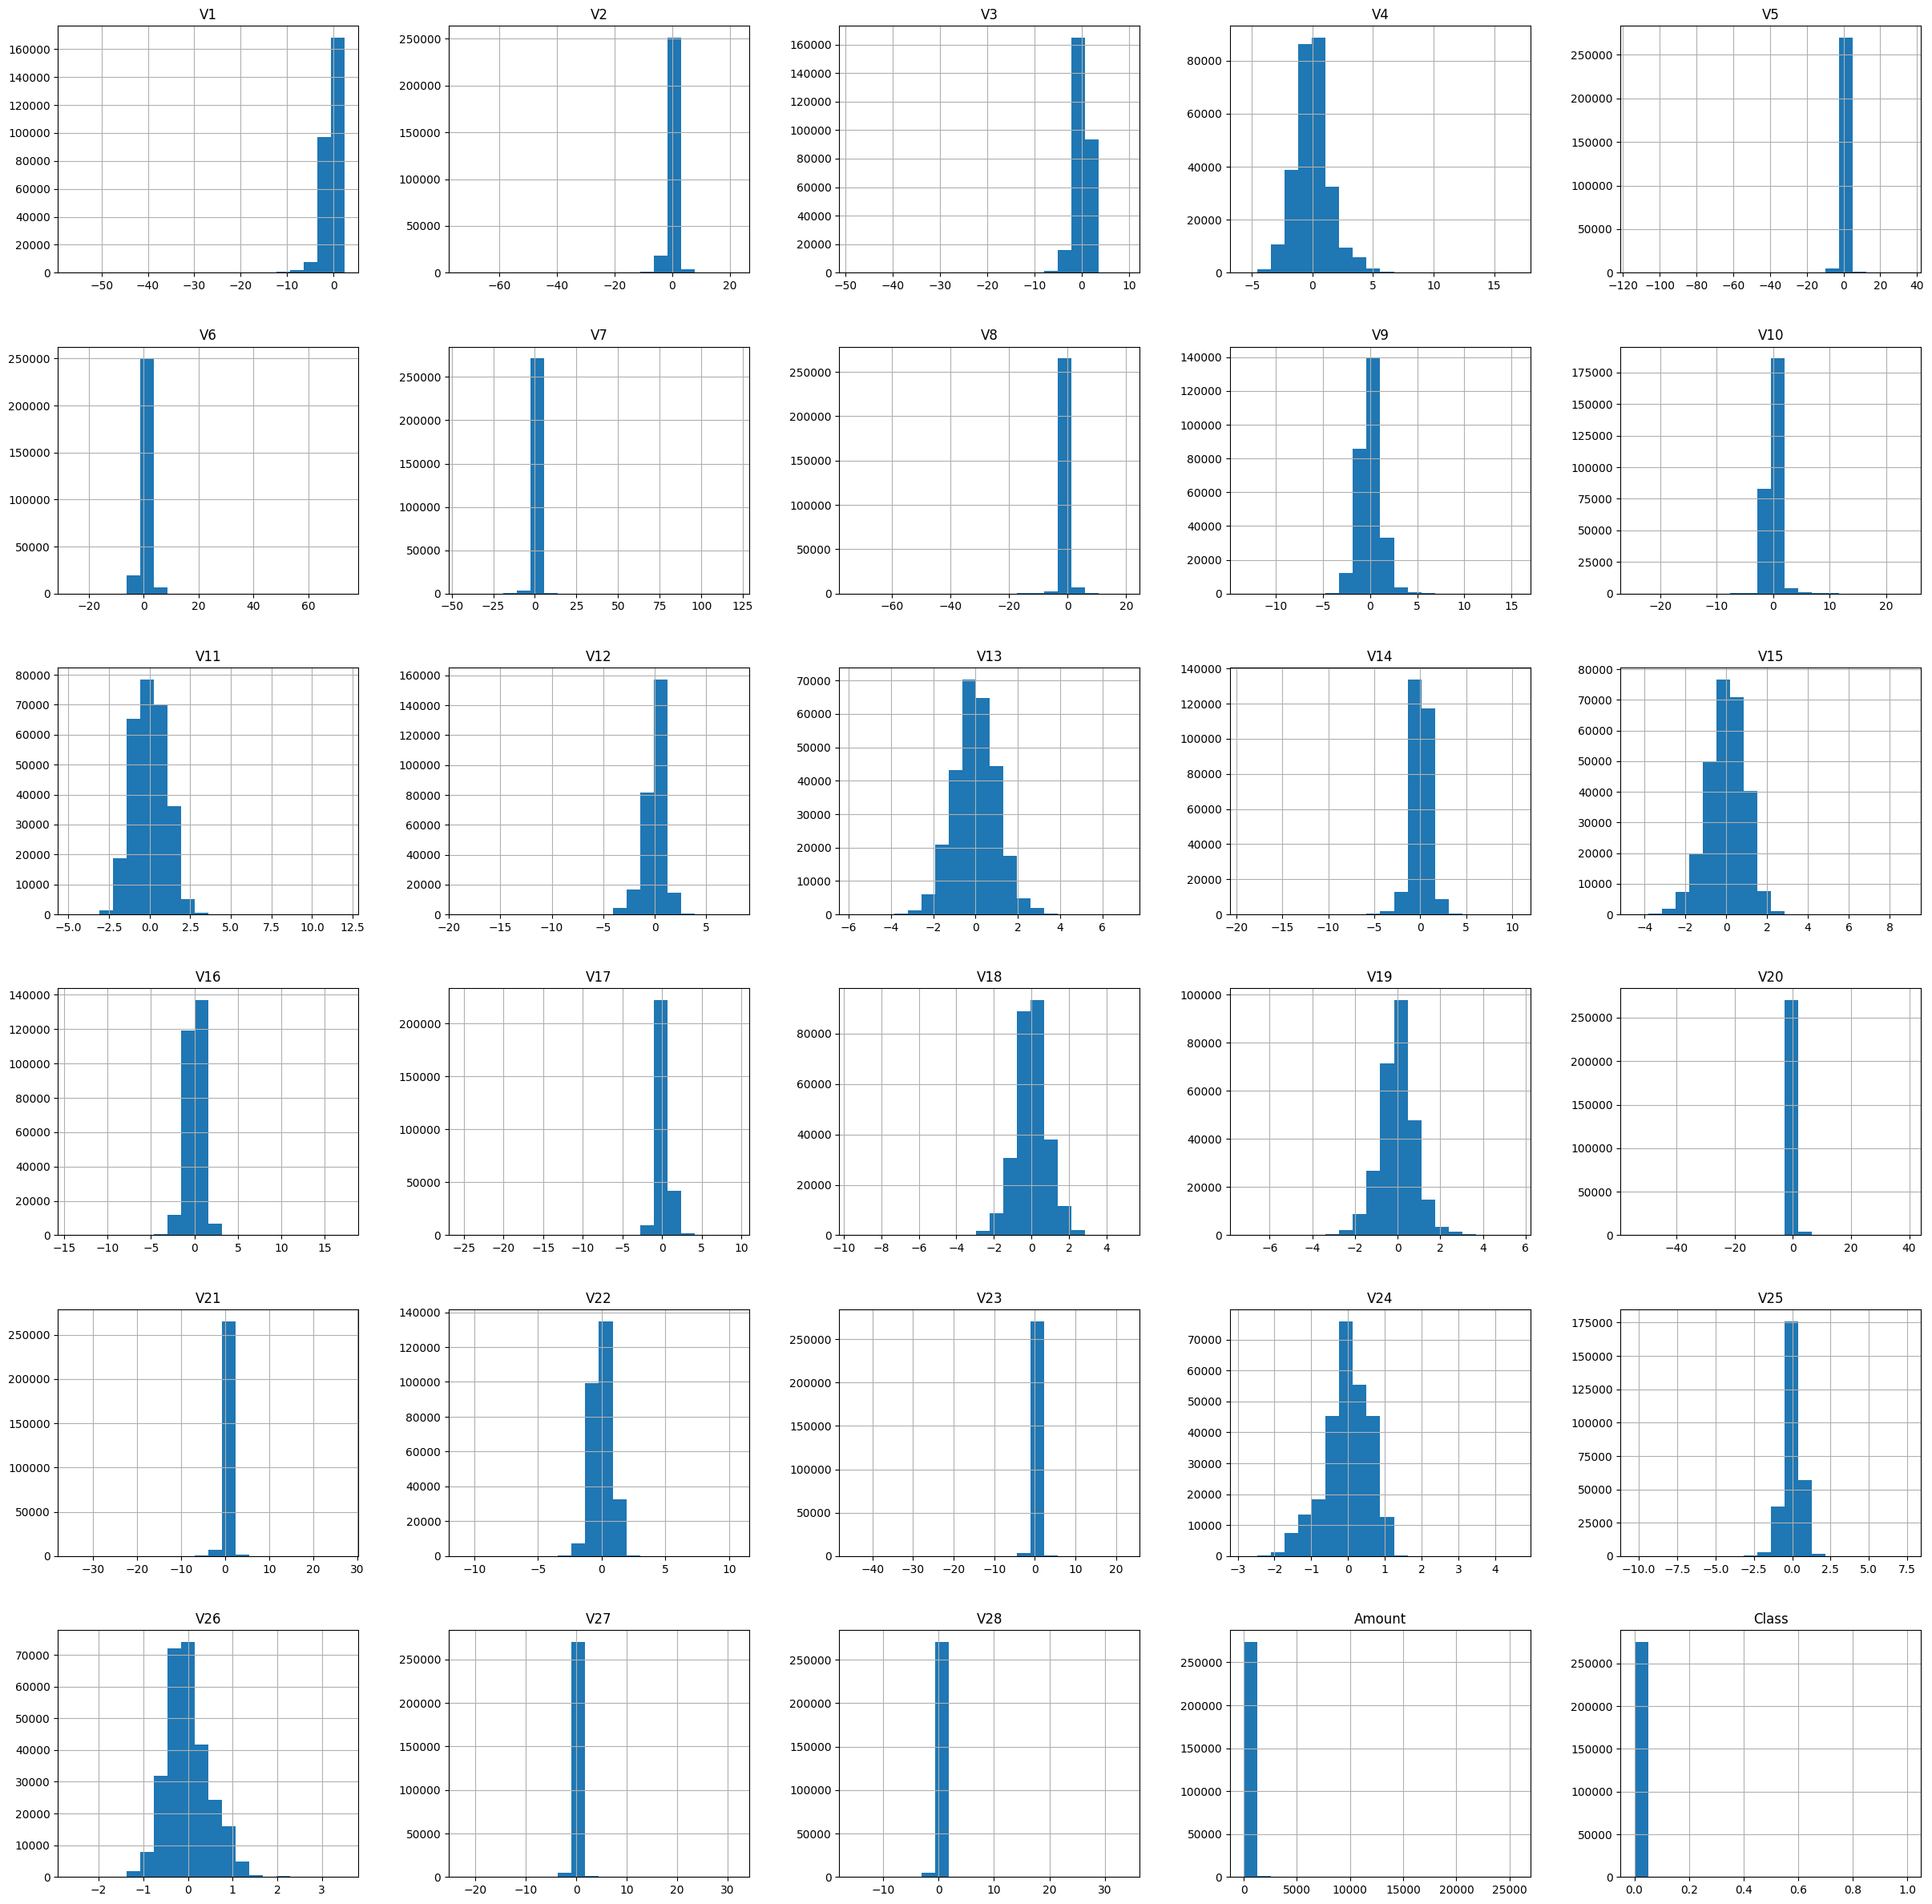

In [14]:
credit.hist(bins = 20, figsize = (30, 30))
plt.show()

# Heatmap

In [15]:
import seaborn as sns

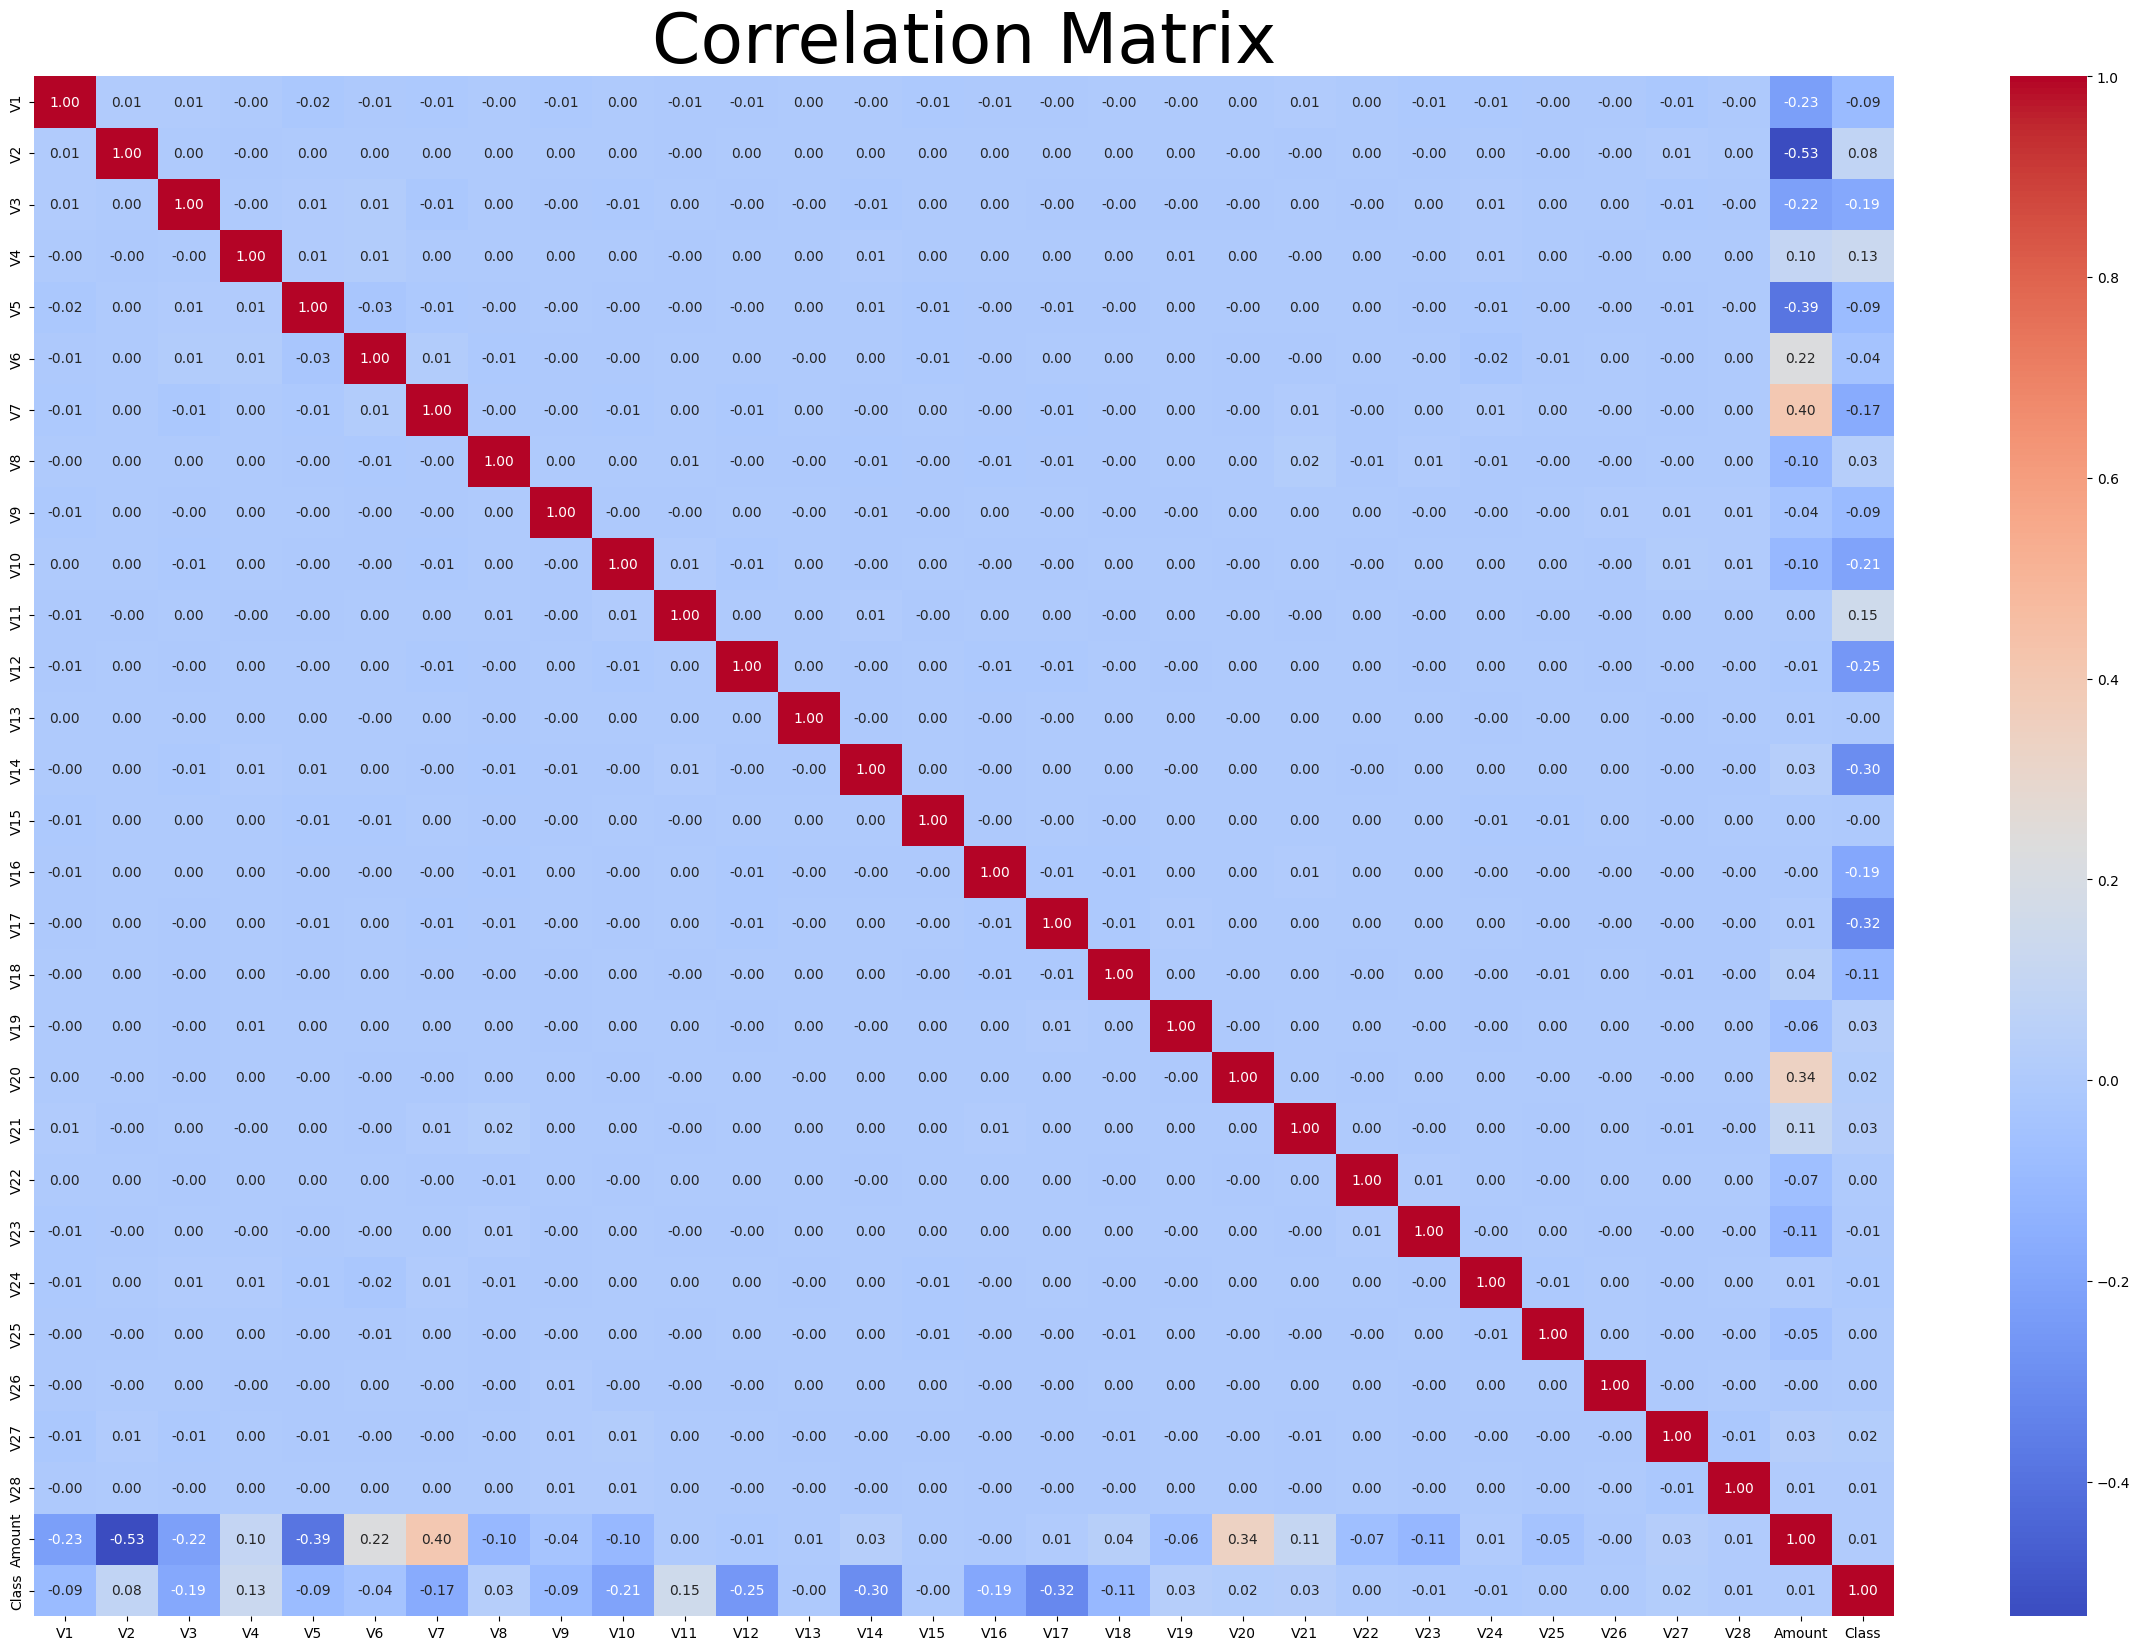

In [16]:
corr_mat = credit.corr()
fig = plt.figure(figsize = (30, 20))
sns.heatmap(corr_mat, annot = True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', size = 50)
plt.show()

#### Distribution of legit transaction & fradulent transaction

In [17]:
credit['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

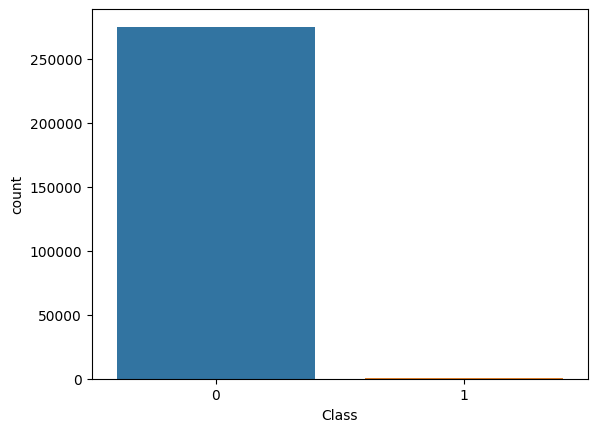

In [18]:
sns.countplot(x = 'Class', data = credit)

In [19]:
legit = credit[credit['Class'] == 0]
fraud = credit[credit.Class == 1]

In [20]:
print(legit.shape)
print(fraud.shape)

(275190, 30)
(473, 30)


In [21]:
credit['Amount'].describe()

count    275663.000000
mean         90.578380
std         253.213954
min           0.000000
25%           6.300000
50%          23.740000
75%          79.910000
max       25691.160000
Name: Amount, dtype: float64

<Axes: ylabel='Amount'>

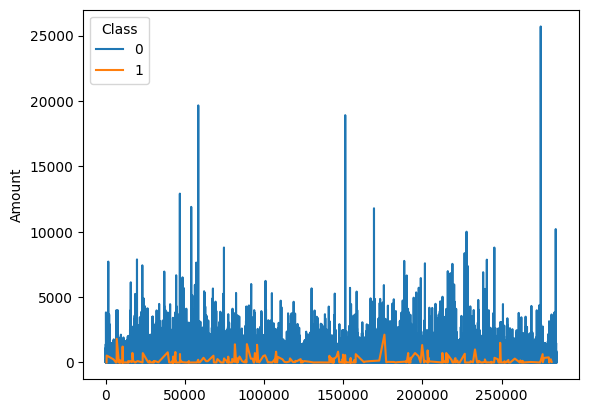

In [22]:
sns.lineplot(x=credit.index, y=credit['Amount'], hue=credit['Class'])

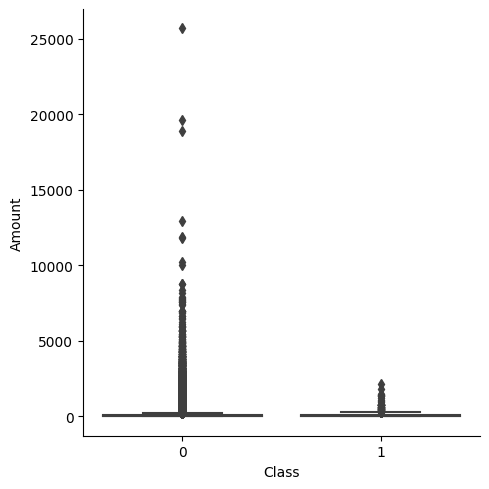

In [23]:
sns.catplot(x='Class', y='Amount', data=credit, kind='box')

In [24]:
legit.Amount.describe()

count    275190.000000
mean         90.521154
std         253.198478
min           0.000000
25%           6.390000
50%          23.750000
75%          79.900000
max       25691.160000
Name: Amount, dtype: float64

<Axes: xlabel='Amount', ylabel='Density'>

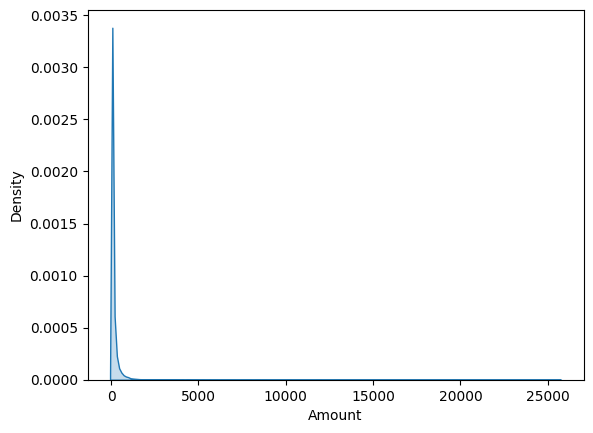

In [25]:
sns.kdeplot(data=legit['Amount'], shade=True)

<Axes: xlabel='Amount'>

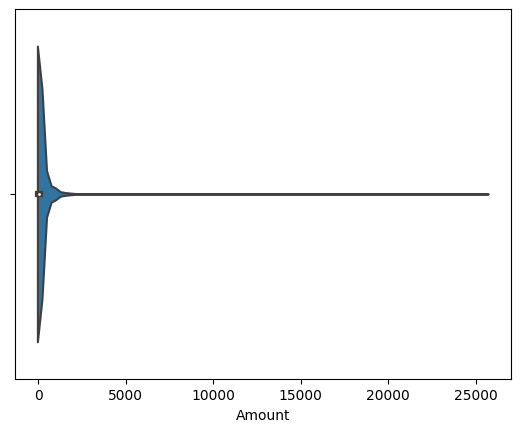

In [26]:
sns.violinplot(x = 'Amount', data = legit)

In [27]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

<Axes: xlabel='Amount', ylabel='Density'>

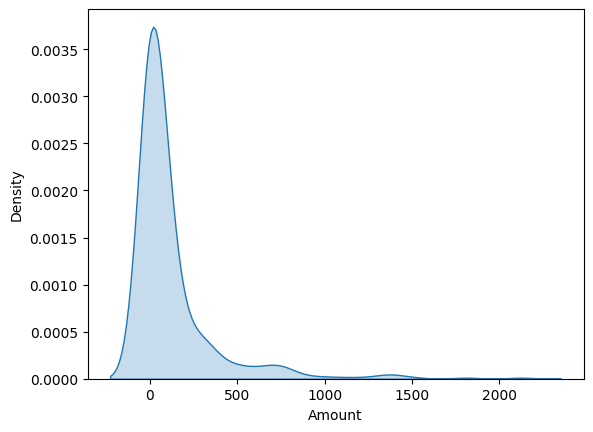

In [28]:
sns.kdeplot(data=fraud['Amount'], shade=True)

<Axes: xlabel='Amount'>

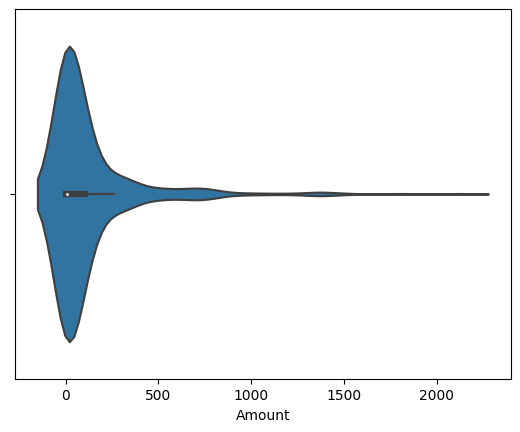

In [29]:
sns.violinplot(x = 'Amount', data = fraud)

#### Compare the values for both transactions

In [30]:
credit.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.029792,-0.008288,0.037131,-0.012054,-0.005596,-0.011768,0.017497,-0.007346,-0.008050,0.012492,-0.013574,0.005134,0.000702,0.012432,-0.010208,0.002550,0.011589,0.007588,-0.000638,0.002717,0.001781,0.005689,-0.001779,-0.006696,-0.004890,-0.000327,0.001557,0.000771,90.521154
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [31]:
X = credit.drop('Class', axis = 1)
y = credit['Class']

In [32]:
print(X)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10       V11       V12       V13  \
0       0.239599  0.098698  0.363787  0.090794 -0.55160

In [33]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 275663, dtype: int64


#### Data Standardization

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
credit['Amount'] = scaler.fit_transform(pd.DataFrame(credit['Amount']))

In [36]:
credit3 = credit.copy()

#### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, stratify = y, random_state = 52)

In [39]:
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(275663, 29) (220530, 29) (55133, 29) (275663,) (220530,) (55133,)


#### Model Evaluation

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
LR = LogisticRegression(random_state=52)

In [42]:
LR.fit(X_train, y_train)

LogisticRegression(random_state=52)

In [43]:
LR.score(X_train, y_train)

0.9992019226409106

<BarContainer object of 29 artists>

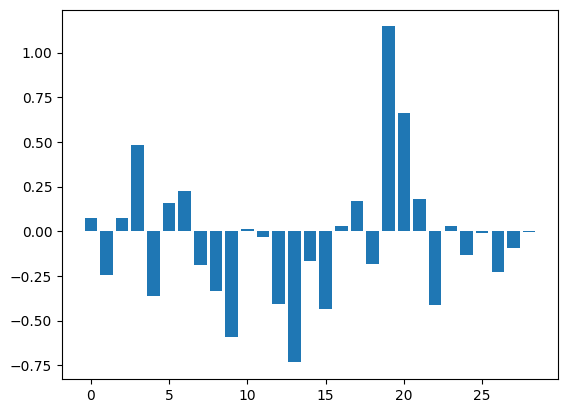

In [44]:
importance = LR.coef_[0]
plt.bar([i for i in range(len(importance))], importance)

In [45]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, roc_auc_score

In [46]:
y_pred = LR.predict(X_test)

Classification Report
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     55038
       Fraud       0.87      0.63      0.73        95

    accuracy                           1.00     55133
   macro avg       0.93      0.82      0.87     55133
weighted avg       1.00      1.00      1.00     55133
 
Confusion Matrix
 [[55029     9]
 [   35    60]]


<Axes: >

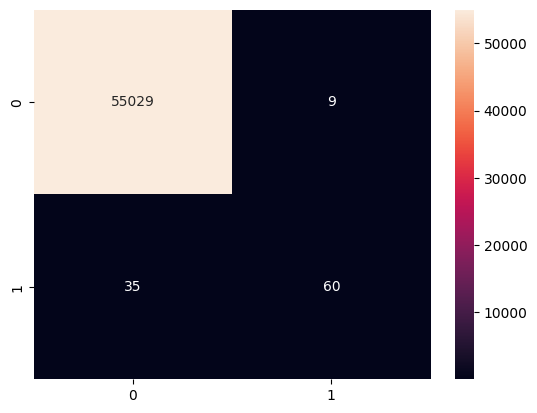

In [47]:
print('Classification Report\n', classification_report(y_test, y_pred, target_names = ['Not Fraud', 'Fraud']),
      '\nConfusion Matrix\n', confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

In [48]:
print(
    '\nAccuracy Score     :     ', accuracy_score(y_test, y_pred),
    '\nPrecision Score    :     ', precision_score(y_test, y_pred),
    '\nRecall Score       :     ', recall_score(y_test, y_pred),
    '\nF1 Score           :     ', f1_score(y_test, y_pred)
)


Accuracy Score     :      0.9992019298786571 
Precision Score    :      0.8695652173913043 
Recall Score       :      0.631578947368421 
F1 Score           :      0.7317073170731707


fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()

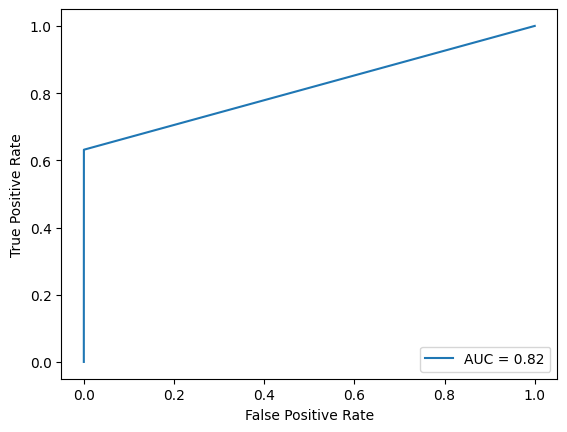

In [49]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()
plt.show()

# UnderSampling

##### Build a sample dataset containing similar distribution of normal transaction and fraudulent transaction

In [50]:
credit['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [51]:
legit_sample = legit.sample(n = 473)

In [52]:
legit_sample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32619,-1.158730,-0.150911,0.617160,-1.734149,-0.219635,-1.049586,-0.303650,0.497828,-1.502123,0.195690,0.569982,-0.614766,-0.861913,0.485180,-0.637081,1.603415,-0.127230,-0.515547,0.305642,0.232701,0.410669,0.725429,-0.135548,-0.002932,-0.057452,-0.320725,0.223218,0.032329,32.90,0
90887,-1.125435,1.290870,1.379376,-0.066545,-0.246907,-0.655167,0.237412,0.515550,-0.863510,-0.752428,1.093667,-0.079906,-1.365225,0.389853,0.380815,0.717670,0.055761,0.593601,0.352429,-0.175829,-0.135987,-0.764344,-0.120409,0.246590,0.054419,0.103259,-0.261518,0.002184,1.98,0
144642,-2.394951,-0.132687,1.567364,-1.224829,-1.248754,0.567816,1.527337,-0.374621,1.517392,0.780670,0.863381,0.473883,-0.165662,-1.213485,-0.792243,0.621591,-1.057746,0.144379,-0.104736,0.126909,-0.539129,-0.039032,-0.398112,0.100141,0.095123,0.836958,0.570891,0.203718,350.00,0
204814,2.174752,-0.660798,-1.407437,-0.535853,-0.389983,-0.843123,-0.315524,-0.300478,-0.589846,0.967231,-1.002334,-0.273670,0.267253,0.254065,0.573337,-1.381874,-0.266196,1.168036,-0.988922,-0.553732,-0.138717,0.114737,0.147271,0.762397,-0.053280,0.760974,-0.069576,-0.055312,21.19,0
66771,-4.255150,2.306802,0.401245,-3.442102,-1.302613,0.118216,-0.261209,0.212174,0.936719,5.965674,1.132360,-0.058522,0.443799,-2.060984,-1.312814,-1.103307,0.316068,-0.531284,-0.756399,1.805841,-0.966763,-0.852541,-0.059912,-0.393272,1.176779,-0.320212,1.779311,1.073267,15.00,0


In [53]:
legit_sample.shape

(473, 30)

##### Concatenating Two DataFrames

In [54]:
new_credit = pd.concat([legit_sample, fraud], axis = 0)    # axis = 0 means Row

In [55]:
new_credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32619,-1.158730,-0.150911,0.617160,-1.734149,-0.219635,-1.049586,-0.303650,0.497828,-1.502123,0.195690,0.569982,-0.614766,-0.861913,0.485180,-0.637081,1.603415,-0.127230,-0.515547,0.305642,0.232701,0.410669,0.725429,-0.135548,-0.002932,-0.057452,-0.320725,0.223218,0.032329,32.90,0
90887,-1.125435,1.290870,1.379376,-0.066545,-0.246907,-0.655167,0.237412,0.515550,-0.863510,-0.752428,1.093667,-0.079906,-1.365225,0.389853,0.380815,0.717670,0.055761,0.593601,0.352429,-0.175829,-0.135987,-0.764344,-0.120409,0.246590,0.054419,0.103259,-0.261518,0.002184,1.98,0
144642,-2.394951,-0.132687,1.567364,-1.224829,-1.248754,0.567816,1.527337,-0.374621,1.517392,0.780670,0.863381,0.473883,-0.165662,-1.213485,-0.792243,0.621591,-1.057746,0.144379,-0.104736,0.126909,-0.539129,-0.039032,-0.398112,0.100141,0.095123,0.836958,0.570891,0.203718,350.00,0
204814,2.174752,-0.660798,-1.407437,-0.535853,-0.389983,-0.843123,-0.315524,-0.300478,-0.589846,0.967231,-1.002334,-0.273670,0.267253,0.254065,0.573337,-1.381874,-0.266196,1.168036,-0.988922,-0.553732,-0.138717,0.114737,0.147271,0.762397,-0.053280,0.760974,-0.069576,-0.055312,21.19,0
66771,-4.255150,2.306802,0.401245,-3.442102,-1.302613,0.118216,-0.261209,0.212174,0.936719,5.965674,1.132360,-0.058522,0.443799,-2.060984,-1.312814,-1.103307,0.316068,-0.531284,-0.756399,1.805841,-0.966763,-0.852541,-0.059912,-0.393272,1.176779,-0.320212,1.779311,1.073267,15.00,0


In [56]:
new_credit.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [57]:
new_credit.shape

(946, 30)

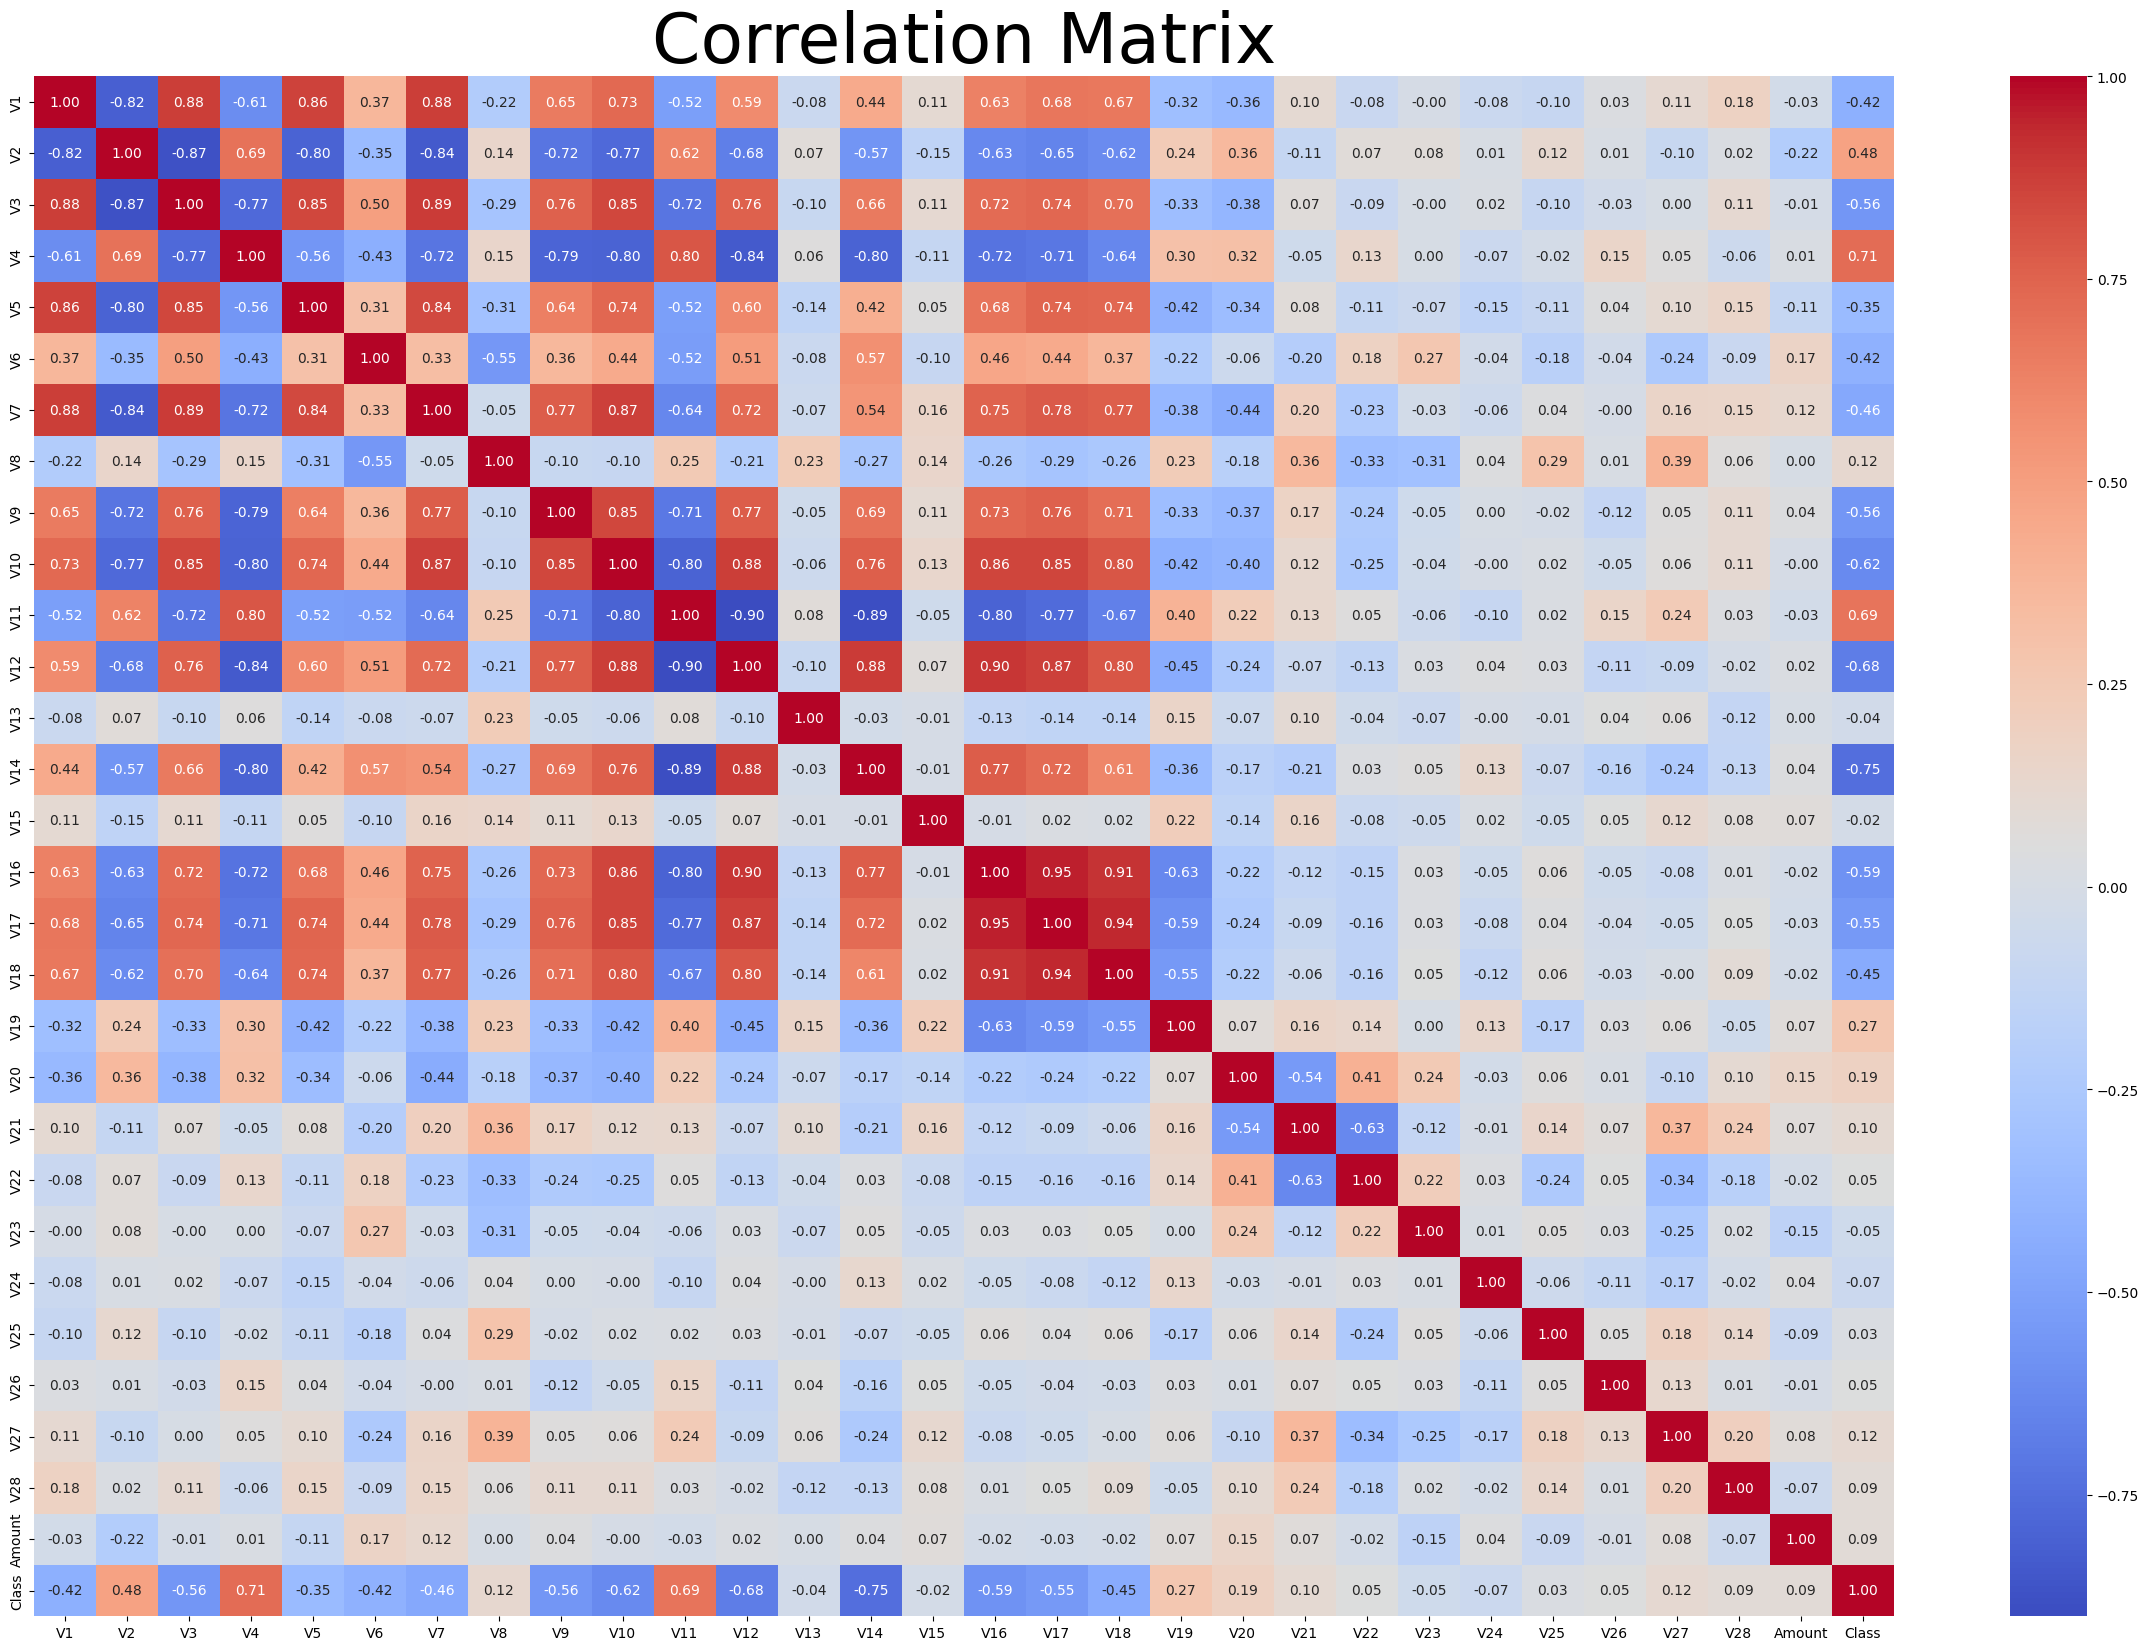

In [58]:
corr = new_credit.corr()
fig = plt.figure(figsize = (30, 20))
sns.heatmap(corr, annot = True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', size = 50)
plt.show()

In [59]:
new_credit['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

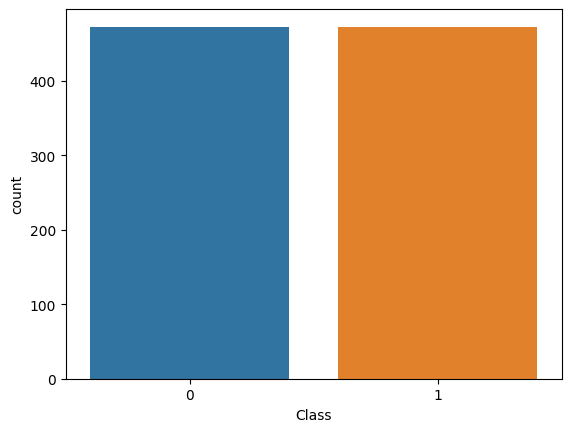

In [60]:
sns.countplot(x = 'Class', data = new_credit)

In [61]:
new_credit.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.017865,0.043301,0.064183,-0.060110,-0.072059,-0.079880,-0.051221,-0.021855,0.049431,-0.031171,-0.104715,0.033483,-0.018084,0.069270,-0.035435,0.013111,-0.017721,0.000102,-0.017876,0.009788,0.033338,-0.008384,0.017382,-0.027202,0.004339,0.003191,-0.001254,0.00882,84.163531
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.07827,123.871860


##### Splitting The Data into Features and Targets

X = new_credit.iloc[:,:-1]

y = new_credit.iloc[:,-1]

In [62]:
X = new_credit.drop('Class', axis = 1)
y = new_credit['Class']

In [63]:
print(X)

              V1        V2        V3        V4        V5        V6        V7  \
32619  -1.158730 -0.150911  0.617160 -1.734149 -0.219635 -1.049586 -0.303650   
90887  -1.125435  1.290870  1.379376 -0.066545 -0.246907 -0.655167  0.237412   
144642 -2.394951 -0.132687  1.567364 -1.224829 -1.248754  0.567816  1.527337   
204814  2.174752 -0.660798 -1.407437 -0.535853 -0.389983 -0.843123 -0.315524   
66771  -4.255150  2.306802  0.401245 -3.442102 -1.302613  0.118216 -0.261209   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8        V9       V10   

In [64]:
print(y)

32619     0
90887     0
144642    0
204814    0
66771     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


##### Split the data into Training Data & Testing Data

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 52)

In [66]:
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(946, 29) (756, 29) (190, 29) (946,) (756,) (190,)


## Model Evaluation

##### Logistic Regression

In [67]:
# Training the Logistic Regression Model with Training Data
LR = LogisticRegression(random_state = 1810052)
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

0.955026455026455

In [68]:
y_pred1 = LR.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred1, target_names = ['Not Fraud', 'Fraud']),
      '\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred1),
      '\nAccuracy Score:\n', accuracy_score(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

   Not Fraud       0.92      0.98      0.95        95
       Fraud       0.98      0.92      0.95        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190
 
Confusion Matrix:
 [[93  2]
 [ 8 87]] 
Accuracy Score:
 0.9473684210526315


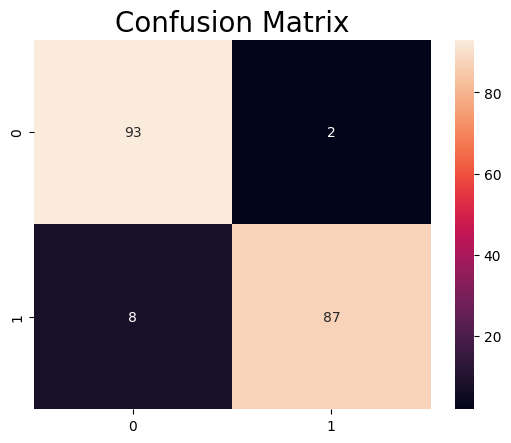

In [69]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot = True, fmt = 'd')
plt.title('Confusion Matrix', size = 20)
plt.show()

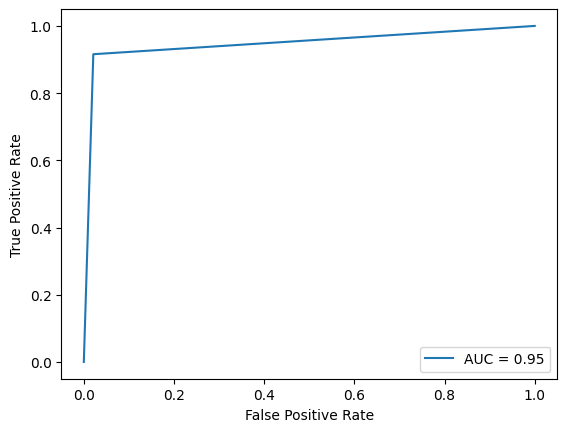

In [70]:
fpr1, tpr1, threshold = roc_curve(y_test, y_pred1)
roc_auc1 = roc_auc_score(y_test, y_pred1)
RocCurveDisplay(fpr = fpr1, tpr = tpr1, roc_auc = roc_auc1).plot()
plt.show()

### Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
DT = DecisionTreeClassifier(random_state = 1810052)
DT.fit(X_train, y_train)
DT.score(X_train, y_train)

1.0

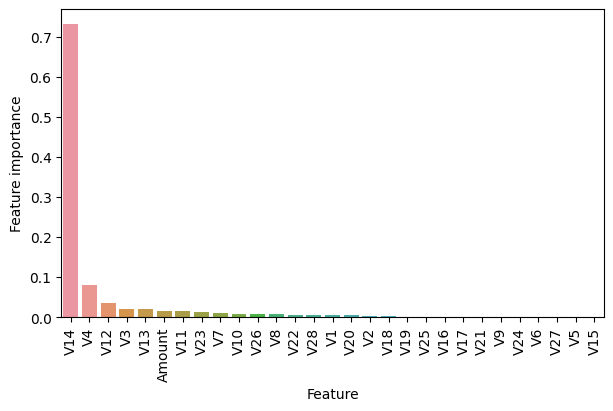

In [73]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': DT.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
sns.barplot(x='Feature', y='Feature importance',data=tmp)
plt.xticks(rotation=90)
plt.show()

In [74]:
y_pred2 = DT.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred2, target_names = ['Not Fraud', 'Fraud']),
      '\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred2),
      '\nAccuracy Score:\n', accuracy_score(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

   Not Fraud       0.93      0.86      0.90        95
       Fraud       0.87      0.94      0.90        95

    accuracy                           0.90       190
   macro avg       0.90      0.90      0.90       190
weighted avg       0.90      0.90      0.90       190
 
Confusion Matrix:
 [[82 13]
 [ 6 89]] 
Accuracy Score:
 0.9


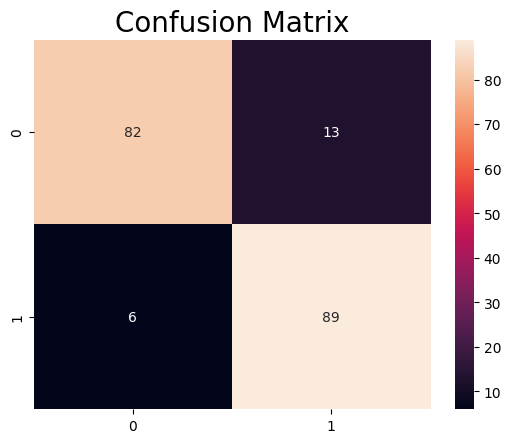

In [75]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot = True, fmt='d')
plt.title('Confusion Matrix', size = 20)
plt.show()

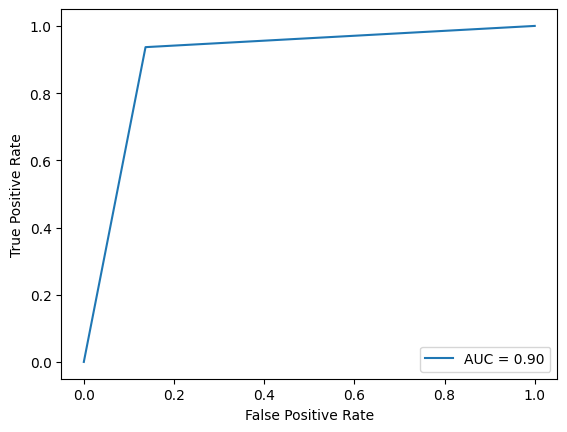

In [76]:
fpr2, tpr2, threshold = roc_curve(y_test, y_pred2)
roc_auc2 = roc_auc_score(y_test, y_pred2)
RocCurveDisplay(fpr = fpr2, tpr = tpr2, roc_auc = roc_auc2).plot()
plt.show()

### Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
RF = RandomForestClassifier(random_state = 1810052)
RF.fit(X_train, y_train)
RF.score(X_train, y_train)

1.0

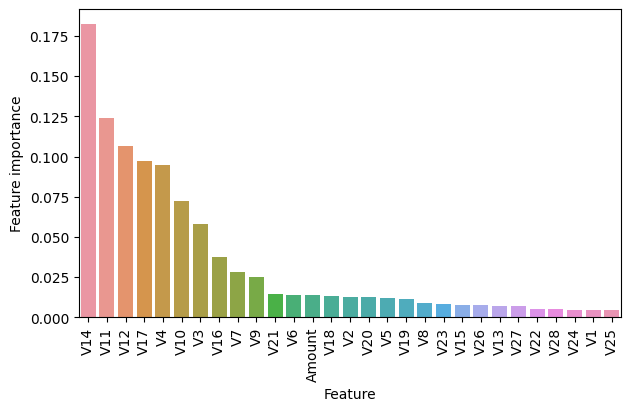

In [79]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': RF.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending = False)
plt.figure(figsize = (7,4))
sns.barplot(x = 'Feature', y='Feature importance', data=tmp)
plt.xticks(rotation = 90)
plt.show()

In [80]:
y_pred3 = RF.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred3, target_names = ['Not Fraud', 'Fraud']),
      '\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred3),
      '\n\nAccuracy Score:\n', accuracy_score(y_test, y_pred3))

Classification Report:
               precision    recall  f1-score   support

   Not Fraud       0.92      0.98      0.95        95
       Fraud       0.98      0.92      0.95        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190
 
Confusion Matrix:
 [[93  2]
 [ 8 87]] 

Accuracy Score:
 0.9473684210526315


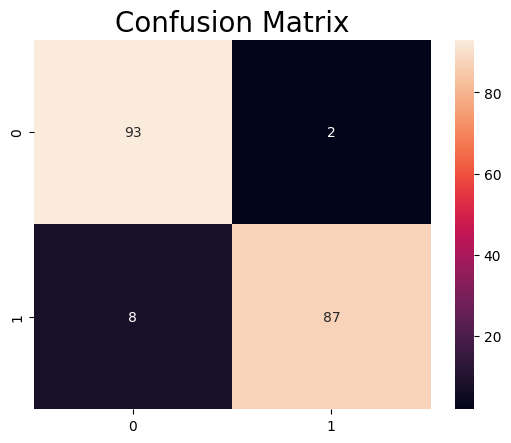

In [81]:
sns.heatmap(confusion_matrix(y_test, y_pred3), annot = True, fmt='d')
plt.title('Confusion Matrix', size = 20)
plt.show()

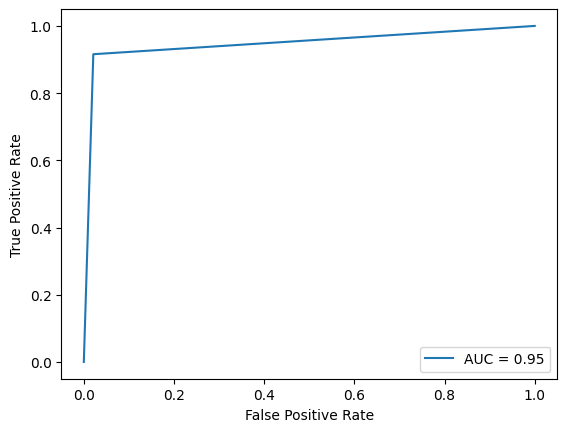

In [82]:
fpr3, tpr3, threshold = roc_curve(y_test, y_pred3)
roc_auc3 = roc_auc_score(y_test, y_pred3)
RocCurveDisplay(fpr = fpr3,
                tpr = tpr3,
                roc_auc = roc_auc3).plot()
plt.show()

### Best Model Selection

In [83]:
mod = pd.DataFrame({'Model':['LR','DT','RF'],
                   'Accuracy(%)':[accuracy_score(y_test, y_pred1)*100,
                                  accuracy_score(y_test, y_pred2)*100,
                                  accuracy_score(y_test, y_pred3)*100
                                  ]})
print(mod)

  Model  Accuracy(%)
0    LR    94.736842
1    DT    90.000000
2    RF    94.736842


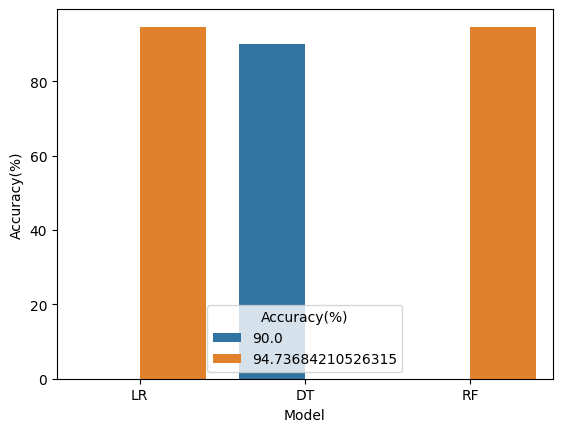

In [84]:
sns.barplot(x = 'Model', y = 'Accuracy(%)', hue = 'Accuracy(%)', data = mod)
plt.show()

In [85]:
import numpy as np
data = [-3.0435406239976,-3.15730712090228,1.08846277997285,2.2886436183814,1.35980512966107,-1.06482252298131,0.325574266158614,-0.0677936531906277,-0.270952836226548,-0.838586564582682,-0.414575448285725,-0.503140859566824,0.676501544635863,-1.69202893305906,2.00063483909015,0.666779695901966,0.599717413841732,1.72532100745514,0.283344830149495,2.10233879259444,0.661695924845707,0.435477208966341,1.37596574254306,-0.293803152734021,0.279798031841214,-0.145361714815161,-0.252773122530705,0.0357642251788156,529]
data = np.asarray(data).reshape(1, -1)

In [86]:
#credit.iloc[616, :]

In [87]:
#credit2.iloc[616, :]

In [88]:
prediction = LR.predict(data)

if (prediction == 0):
    print('The transaction is \033[32mNormal')
else:
    print('The transaction is \033[31mFraudulent')

The transaction is Fraudulent


# OverSampling

In [89]:
credit3.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.233169,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.347092,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.137702,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.130015,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.081308,0


In [90]:
credit3.shape

(275663, 30)

In [91]:
X = credit3.iloc[:,:-1]
y = credit3.iloc[:,-1]

In [92]:
print(X)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10       V11       V12       V13  \
0       0.239599  0.098698  0.363787  0.090794 -0.55160

In [93]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 275663, dtype: int64


In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
X_res, y_res = SMOTE(random_state = 52).fit_resample(X, y)

In [96]:
X_res.shape

(550380, 29)

In [97]:
y_res.shape

(550380,)

In [98]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

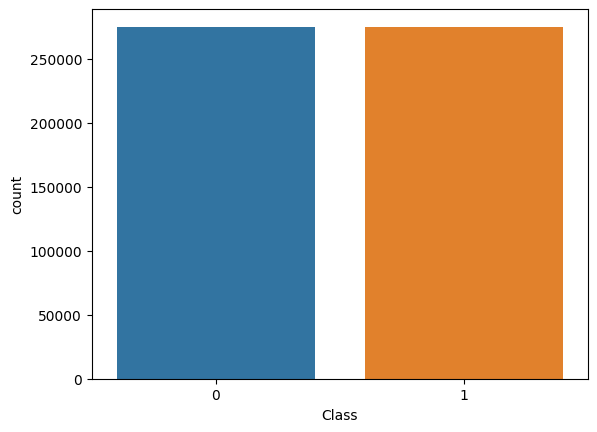

In [99]:
sns.countplot(x = y_res)

### Train Test Split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, stratify = y_res, random_state = 52)

In [101]:
LR = LogisticRegression(random_state = 52)
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

0.9446973000472401

### Logistic Regression

In [102]:
y_pred1 = LR.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred1, target_names = ['Not Fraud', 'Fraud']),
      '\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred1),
      '\n\nAccuracy Score:\n', accuracy_score(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

   Not Fraud       0.92      0.97      0.95     55038
       Fraud       0.97      0.91      0.94     55038

    accuracy                           0.94    110076
   macro avg       0.95      0.94      0.94    110076
weighted avg       0.95      0.94      0.94    110076
 
Confusion Matrix:
 [[53636  1402]
 [ 4728 50310]] 

Accuracy Score:
 0.9443112031687197


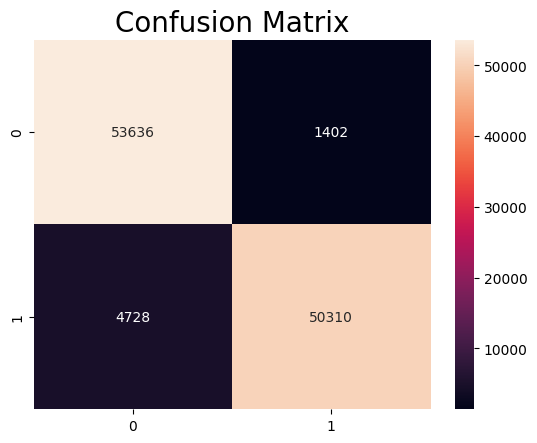

In [103]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot = True, fmt='d')
plt.title('Confusion Matrix', size = 20)
plt.show()

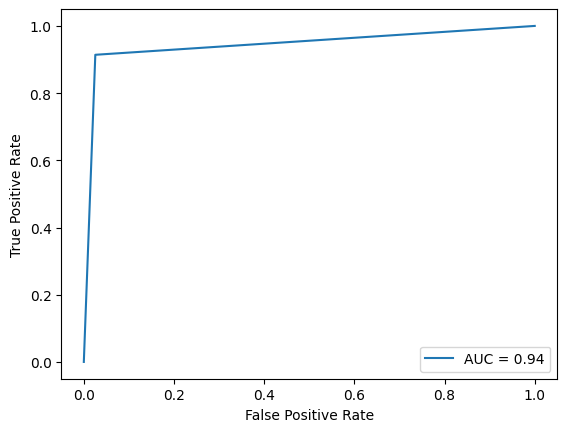

In [104]:
fpr1, tpr1, threshold = roc_curve(y_test, y_pred1)
roc_auc1 = roc_auc_score(y_test, y_pred1)
RocCurveDisplay(fpr = fpr1, tpr = tpr1, roc_auc = roc_auc1).plot()
plt.show()

### Decision Tree Classifier

In [105]:
DT = DecisionTreeClassifier(random_state = 52)
DT.fit(X_train, y_train)
DT.score(X_train, y_train)

1.0

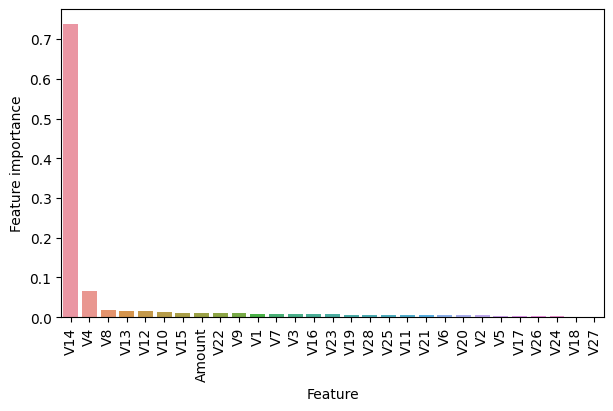

In [106]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': DT.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
sns.barplot(x='Feature', y='Feature importance',data=tmp)
plt.xticks(rotation=90)
plt.show()

In [107]:
y_pred2 = DT.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred2, target_names = ['Not Fraud', 'Fraud']),
      '\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred2),
      '\n\nAccuracy Score:\n', accuracy_score(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     55038
       Fraud       1.00      1.00      1.00     55038

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076
 
Confusion Matrix:
 [[54878   160]
 [   50 54988]] 

Accuracy Score:
 0.998092227188488


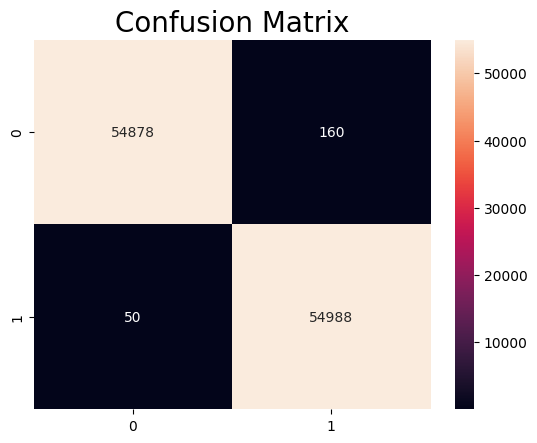

In [108]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot = True, fmt = 'd')
plt.title('Confusion Matrix', size = 20)
plt.show()

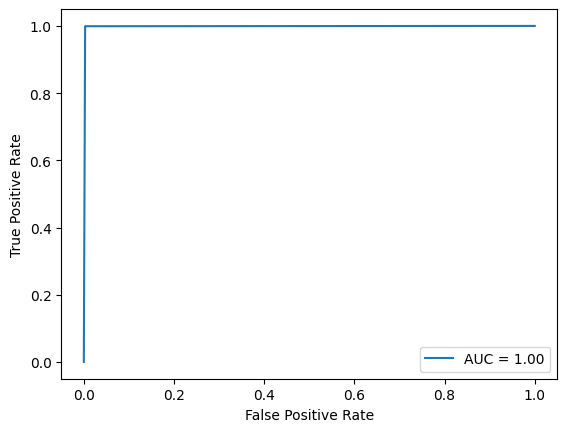

In [109]:
fpr2, tpr2, threshold = roc_curve(y_test, y_pred2)
roc_auc2 = roc_auc_score(y_test, y_pred2)
RocCurveDisplay(fpr = fpr2, tpr = tpr2, roc_auc = roc_auc2).plot()
plt.show()

### Random Forest Classifier

In [110]:
RF = RandomForestClassifier(random_state = 52)
RF.fit(X_train, y_train)
RF.score(X_train, y_train)

1.0

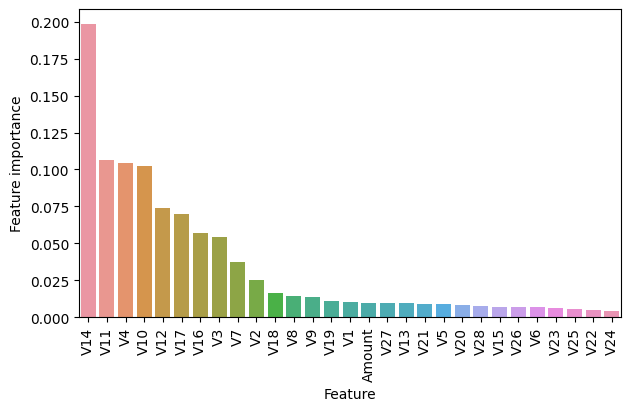

In [111]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': RF.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
sns.barplot(x='Feature', y='Feature importance',data=tmp)
plt.xticks(rotation=90)
plt.show()

In [112]:
y_pred3 = RF.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred3, target_names = ['Not Fraud', 'Fraud']),
      '\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred3),
      '\n\nAccuracy Score:\n', accuracy_score(y_test, y_pred3))

Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     55038
       Fraud       1.00      1.00      1.00     55038

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076
 
Confusion Matrix:
 [[55025    13]
 [    0 55038]] 

Accuracy Score:
 0.999881899778335


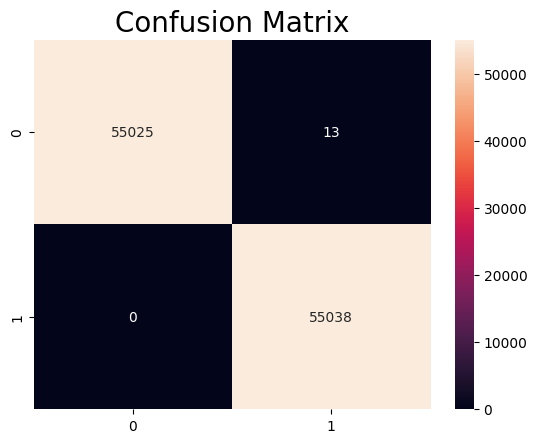

In [113]:
sns.heatmap(confusion_matrix(y_test, y_pred3), annot = True, fmt = 'd')
plt.title('Confusion Matrix', size = 20)
plt.show()

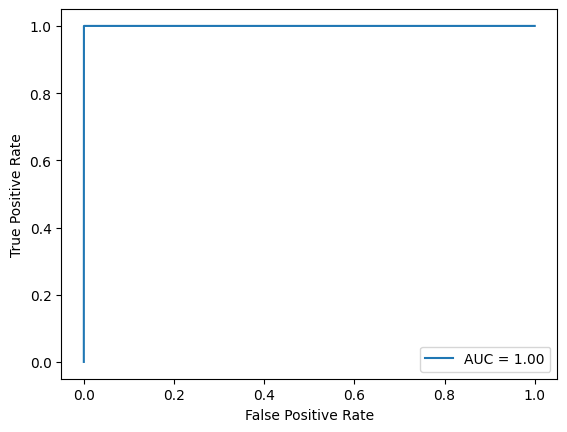

In [114]:
fpr3, tpr3, threshold = roc_curve(y_test, y_pred3)
roc_auc3 = roc_auc_score(y_test, y_pred3)
RocCurveDisplay(fpr = fpr3, tpr = tpr3, roc_auc = roc_auc3).plot()
plt.show()

# Best Model Selection

In [115]:
mod = pd.DataFrame({'Model':['LR','DT','RF'],
                   'Accuracy(%)':[accuracy_score(y_test, y_pred1)*100,
                                  accuracy_score(y_test, y_pred2)*100,
                                  accuracy_score(y_test, y_pred3)*100
                                  ]})

In [116]:
print(mod)

  Model  Accuracy(%)
0    LR    94.431120
1    DT    99.809223
2    RF    99.988190


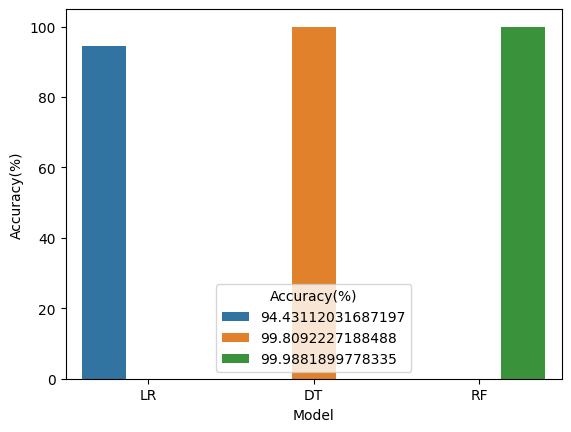

In [117]:
sns.barplot(x = 'Model', y = 'Accuracy(%)', hue = 'Accuracy(%)', data = mod)
plt.show()

# Save The Model

In [118]:
import pickle
save_model = pickle.dumps(RF)

### Load saved model

In [119]:
RFC_model = pickle.loads(save_model)

In [120]:
data = [[-3.0435406239976,-3.15730712090228,1.08846277997285,2.2886436183814,1.35980512966107,-1.06482252298131,0.325574266158614,-0.0677936531906277,-0.270952836226548,-0.838586564582682,-0.414575448285725,-0.503140859566824,0.676501544635863,-1.69202893305906,2.00063483909015,0.666779695901966,0.599717413841732,1.72532100745514,0.283344830149495,2.10233879259444,0.661695924845707,0.435477208966341,1.37596574254306,-0.293803152734021,0.279798031841214,-0.145361714815161,-0.252773122530705,0.0357642251788156,529]]

In [121]:
RFC_model.predict(data)

if (prediction == 0):
    print('The transaction is \033[32mNormal')
else:
    print('The transaction is \033[31mFraudulent')

The transaction is Fraudulent


In [122]:
RFC_model.predict(X_test)

array([1, 1, 0, ..., 0, 1, 0])

In [123]:
with open('Credit_Card_Model.pkl', 'wb') as file:
    pickle.dump(RFC_model, file)

In [124]:
with open('Credit_Card_Model.pkl', 'rb') as file:
    credit_model = pickle.load(file)

In [125]:
prediction = credit_model.predict(data)

if (prediction[0] == 0):
    print('The transaction is \033[32mNormal')
else:
    print('The transaction is \033[31mFraudulent')

The transaction is Fraudulent


# OR

In [126]:
import joblib
joblib.dump(RF, 'Credit_Card_Model.plk')

['Credit_Card_Model.plk']

In [127]:
model = joblib.load('Credit_Card_Model.plk')

In [128]:
data = np.asarray(credit2.iloc[615, 0:29]).reshape(1, -1)

In [129]:
prediction = model.predict(data)

if (prediction[0] == 0):
    print('The transaction is \033[32mNormal')
else:
    print('The transaction is \033[31mFraudulent')

The transaction is Normal
